In [3]:
import wrist_segmentation.data.preprocess as preprocess
import wrist_segmentation.data.loader as loader
from wrist_segmentation.utils.config import Config, BaseConfig
from wrist_segmentation.models import BaseModel
from wrist_segmentation.utils.callbacks import TensorBoardImage, gencallbacks
from wrist_segmentation.utils.other import set_seed

import pydicom
import glob
import os
import numpy as np

In [55]:
def preprocess_images(X):
    X = preprocess.center_crop(X, np.array((256,256)))
    X = preprocess.white_norm_img(X)
    return X
    
def dicom_reader(folder):
    folder = os.path.join(folder,'*.dcm')
    paths = glob.glob(folder)
    N = len(paths)
    X = []
    for path in paths:
        # print(path)
        dcm = pydicom.dcmread(path)
        x = dcm.pixel_array
        x = preprocess_images(x)
        X.append(x)

    return np.array(X)


In [8]:
config_file = 'config_test'
cfg = BaseConfig(config_file)

config = Config(cfg.MODEL_CONFIGS[0], log_config=cfg.LOG_CONFIG)
config.merge(cfg)


In [56]:
folder = config.DATA_PATH
X = dicom_reader(folder)

config.IMAGE_SIZE = X.shape[1:]
config.BATCH_SIZE = 2

X = np.expand_dims(X, axis=-1)


In [57]:
model = BaseModel.BaseModel(config)

Importing UNet_AL
Finetuning, loaded d:\new_srw\wrist_segmentation\models/UNet_AL_4down_4up_/UNet_AL_model.60-0.7425-0.010246_20220329-165505.h5


In [58]:
y = model.model.predict(X, batch_size=config.BATCH_SIZE)

In [16]:
import matplotlib.pyplot as plt

(-0.5, 255.5, 255.5, -0.5)

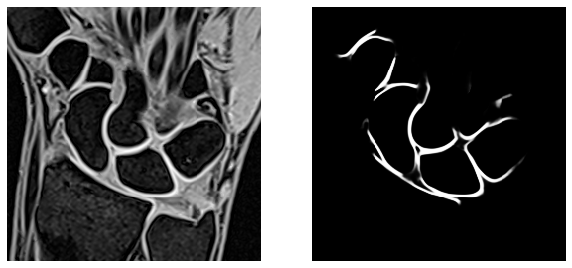

In [59]:
N = 100
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(X[N,...,0], cmap='gray')
plt.axis(False)
plt.subplot(122)
plt.imshow(y[N,...,0], cmap='gray')
plt.axis(False)


In [60]:
img_rgb = X
img_rgb = np.append(img_rgb,X,axis=3)
img_rgb = np.append(img_rgb,X,axis=3)

img_rgb = (img_rgb -  np.min(img_rgb))  / (np.max(img_rgb) - np.min(img_rgb))

img_rgb[...,1] = img_rgb[...,1] + y[...,0]
img_rgb[img_rgb>1] = 1

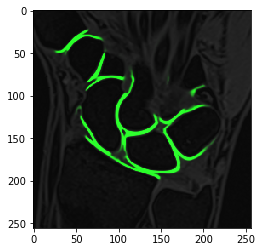

In [61]:

plt.imshow(img_rgb[N,:,:,:])


In [62]:
from scipy.io import savemat
import os
from PIL import Image


size = 1024, 1024

fold = r'D:\new_SRW\wrist_segmentation\output\test_crop'

if not os.path.exists(fold):
        os.makedirs(fold)

for i in range(img_rgb.shape[0]):
    filename = fold + '\\Predicted{0}.jpg'.format(i)
    plt.imsave(filename,img_rgb[i,...])
